In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from os import system
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay, f1_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, HalvingRandomSearchCV
from sklearn.feature_selection import mutual_info_classif

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
print(df_train.columns.tolist())
print(np.shape(df_train))
df_train.head()

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID,TARGET
0,2.0,5.0,5132022,5,13,2022,1100.0,2022000436,2.022000e+09,1.0,...,1.0,2.700000e+01,1.0,1.870000e+02,1.0,1.0,1.0,2.0,0,True
1,9.0,1.0,2282022,2,28,2022,1200.0,2022005381,2.022005e+09,NaN,...,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,NaN,1,False
2,19.0,1.0,1202022,1,20,2022,1100.0,2022000927,2.022001e+09,1.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,9.0,2,False
3,39.0,8.0,8122022,8,12,2022,1100.0,2022014408,2.022014e+09,NaN,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,3,False
4,25.0,7.0,7222022,7,22,2022,1200.0,2022010910,2.022011e+09,NaN,...,1.0,1.700000e+01,2.0,4.670000e+02,1.0,NaN,NaN,2.0,4,False


In [5]:
df_train.columns[240]

'RRPHYSM2'

In [23]:
keep_columns = ['_STATE', 'LADULT1', 'COLGSEX1', 'LANDSEX1', 'CADULT1', 'CELLSEX1', 'SEXVAR',
                'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1',
                'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'CVDSTRK3', 'ASTHMA3',
                'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4',
                'VETERAN3', 'WEIGHT2', 'HEIGHT3', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'CERVSCRN',
                'CRVCLPAP', 'CIMEMLOS', 'CAREGIV1', 'SDHISOLT', 'SDHEMPLY', 'MARIJAN1', 'LASTSMK2',
                'ASBIDRNK']

delete_columns = [ 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1',
                  'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'NUMADULT', 'NUMMEN', 'NUMWOMEN',
                  'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1',
                  'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'HAVARTH4', 'MARITAL', 'EDUCA',
                  'RENTHOM1', 'NUMHHOL4', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'DEAF', 'BLIND',
                  'DECIDE', 'HADMAM', 'HOWLONG', 'CRVCLCNC', 'PCSTALK1', 'CDHOUSE', 'CDASSIST', 'CDHELP',
                  'CDSOCIAL', 'CDDISCUS', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD',
                  'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN',
                  'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',
                  'ACEADSAF', 'ACEADNED', 'EMPSUPRT', 'LSATISFY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS',
                  'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'MARJSMOK', 'MARJEAT', 'MARJVAPE', 'MARJDAB',
                  'MARJOTHR', 'STOPSMK2', 'MENTCIGS', 'MENTECIG', 'HEATTBCO', 'ASBIALCH', 'ASBIBING',
                  'ASBIADVC', 'ASBIRDUC', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 'RCSXBRTH',
                  'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR',
                  'HADSEX', 'PFPPRVN4', 'TYPCNTR9', 'BRTHCNT4', 'WHEREGET', 'NOBCUSE8', 'BCPREFER',
                  'RRCLASS3', 'RRCOGNT2', 'RRTREAT', 'RRATWRK2', 'RRHCARE4', 'RRPHYSM2' ]


missing_columns = ['CVDINFR4', 'CVDCRHD4']


In [9]:
with open("features.yaml", "r") as f:
    config = yaml.safe_load(f)

selected_columns = config['features']

df_train = df_train[selected_columns]

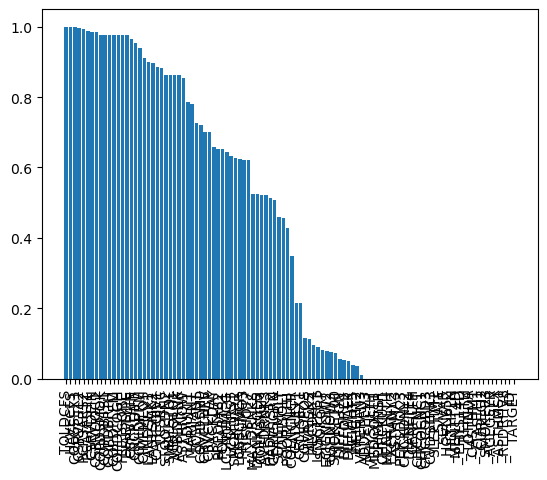

In [4]:
nan_proportion = df_train.isna().sum() / len(df_train)
nan_proportion.sort_values(ascending=False,inplace=True)
plt.figure()
plt.bar(nan_proportion.index,nan_proportion.values)
plt.xticks(rotation=90)
plt.show()

In [40]:
def clean_data(df):
    nan_proportion = df.isna().sum().sort_values(ascending=False) / len(df)

    for i, prop in enumerate(nan_proportion.values):
        if prop > 0.95:
            print(nan_proportion.index[i], prop)

In [ ]:
clean_data(df_train)

TOLDCFS 1.0
HAVECFS 1.0
COLGSEX1 0.9999377777777778
CSRVCTL2 0.9967955555555555
PCPSARS2 0.9934088888888889
PSATEST1 0.9870088888888889
CSRVDEIN 0.9840844444444444
CSRVDOC1 0.9839688888888889
COPDSMOK 0.9760044444444445
COPDBTST 0.9759555555555556
COPDBRTH 0.9759111111111111
COPDFLEM 0.9758755555555556
COPDCOGH 0.9758533333333334
FEETSORE 0.9754711111111111
DIABTYPE 0.9754711111111111
CSRVPAIN 0.9654488888888889
CNCRDIFF 0.9541022222222222


In [10]:
X = df_train.drop(columns='TARGET')
Y = df_train['TARGET']

In [46]:
print(df_train.dtypes.tolist())

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('fl

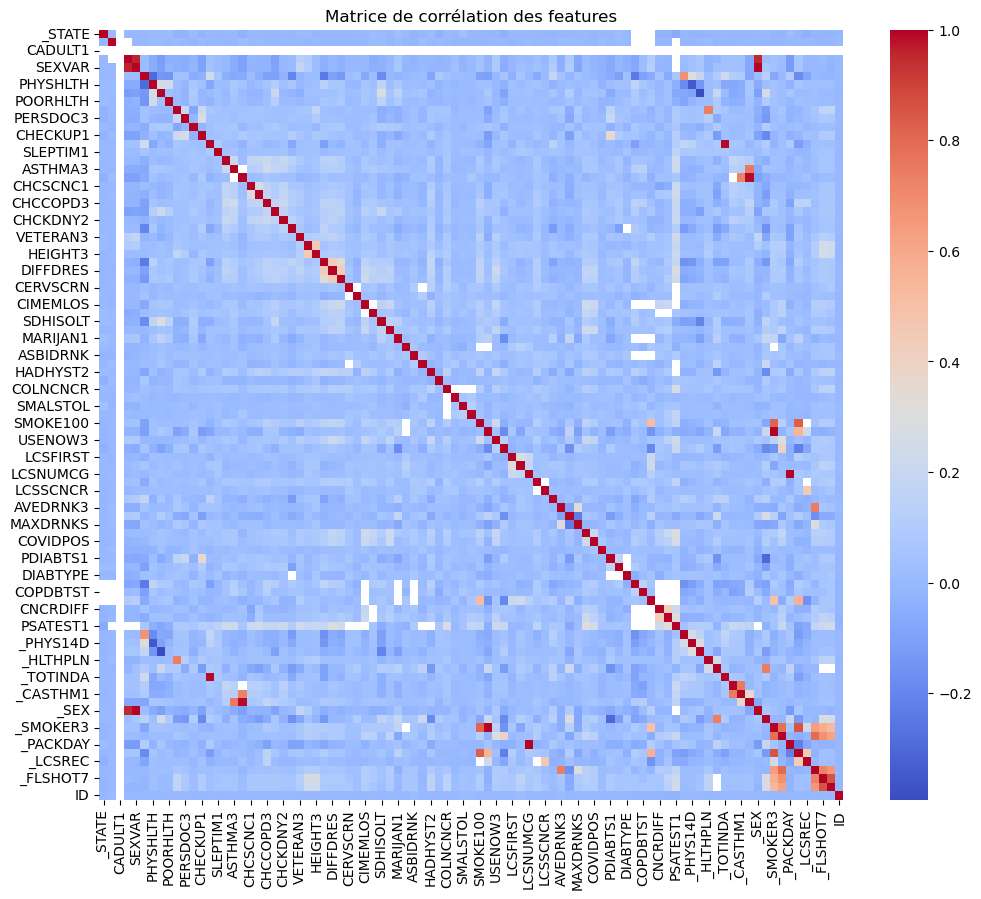

forte corrélation entre CELLSEX1 et SEXVAR
forte corrélation entre CELLSEX1 et _SEX
forte corrélation entre SEXVAR et _SEX
forte corrélation entre EXERANY2 et _TOTINDA
forte corrélation entre ASTHNOW et _ASTHMS1
forte corrélation entre SMOKDAY2 et _SMOKER3
forte corrélation entre LCSNUMCG et _PACKDAY


In [11]:
corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation des features")
plt.show()
for i in range(len(corr.values)):
    for j in range(i, len(corr.values[0])):
        if corr.values[i,j] > 0.9 and corr.values[i,j] != 1.0:
            print(f"forte corrélation entre {X.columns[i]} et {X.columns[j]}")

In [12]:
X.drop(columns=['CELLSEX1','SEXVAR','EXERANY2','ASTHNOW','SMOKDAY2','LCSNUMCG'],inplace=True)

In [ ]:
for col in X.columns:
    print(col, df_train[col].nunique(), df_train[col].unique()[:10])

_STATE 36 [ 2.  9. 19. 39. 25.  6. 33. 20. 12. 29.]
LADULT1 2 [ 1. nan  2.]
CADULT1 1 [nan  1.]
GENHLTH 7 [ 3.  2.  4.  1.  5.  7.  9. nan]
PHYSHLTH 33 [30. 88.  5.  2.  3.  1. 21.  4. 12. 10.]
MENTHLTH 33 [88. 15.  3.  4.  2. 77.  5.  1. 99. 30.]
POORHLTH 33 [88. 14. nan  5.  2.  3. 10. 21.  1.  7.]
PRIMINSR 13 [ 3. 10.  1.  9.  2.  5.  7. 88. 99. 77.]
PERSDOC3 5 [ 1.  2.  3.  7.  9. nan]
MEDCOST1 4 [ 2.  1.  7.  9. nan]
CHECKUP1 7 [ 1.  3.  2.  4.  8.  7.  9. nan]
SLEPTIM1 26 [ 7.  6.  8. 10. 77.  4.  9. 15.  5.  2.]
CVDSTRK3 4 [ 2.  1.  7.  9. nan]
ASTHMA3 4 [ 2.  1.  7.  9. nan]
CHCSCNC1 4 [ 2.  1.  7.  9. nan]
CHCOCNC1 4 [ 1.  2.  7.  9. nan]
CHCCOPD3 4 [ 2.  1.  7.  9. nan]
ADDEPEV3 4 [ 2.  1.  7.  9. nan]
CHCKDNY2 4 [ 1.  2.  7.  9. nan]
DIABETE4 6 [ 3.  1.  4.  2.  7.  9. nan]
VETERAN3 4 [ 2.  1. nan  9.  7.]
WEIGHT2 556 [165. 143. 285. 245. 180. 215. 200. 250. 210. 129.]
HEIGHT3 133 [502. 511. 600. 601. 509. 503. 501.  nan 504. 507.]
DIFFWALK 4 [ 2.  1. nan  7.  9.]
DIFFDRES 4

In [ ]:
categorical_columns = ['_STATE','GENHLTH','PRIMINSR',
                       'PERSDOC3','MEDCOST1','CHECKUP1',
                       'CVDSTRK3','ASTHMA3','CHCSCNC1',
                       'CHCOCNC1','CHCCOPD3','ADDEPEV3',
                       'CHCKDNY2','DIABETE4','VETERAN3',
                       'DIFFWALK','DIFFDRES','DIFFALON',
                       'CERVSCRN','CRVCLPAP','CIMEMLOS',
                       'CAREGIV1','SDHISOLT','SDHEMPLY',
                       'LASTSMK2','ASBIDRNK','CRVCLHPV',
                       'HADHYST2','COLNSIGM','COLNCNCR',
                       'VIRCOLO1','SMALSTOL','STOOLDN2',
                       'SMOKE100','USENOW3','ECIGNOW2',
                       'LCSCTSC1','LCSSCNCR','HIVRISK5',
                       'COVIDPOS','COVIDSMP','PDIABTS1',
                       'PREDIAB2','DIABTYPE','COPDBRTH',
                       'COPDBTST','CNCRDIFF','CSRVPAIN',
                       'PSATEST1','_RFHLTH','_PHYS14D',
                       '_MENT14D','_HLTHPLN','_HCVU652',
                       '_TOTINDA','_LTASTH1','_CASTHM1',
                       'ASTHMS1','_SEX','_AGEG5YR','_SMOKER3',
                       '_CURECI2','_SMOKGRP','_LCSREC',
                       'RFDRHV8','FLSHOT7','_PNEUMO3']

continuous_columns = ['PHYSHLTH','MENTHLTH','POORHLTH',
                      'SLEPTIM1','WEIGHT2','HEIGHT3',
                      'MARIJAN1','ALCDAY4','AVEDRNK3','DRNK3GE5',
                      'MAXDRNKS','COPDSMOK','_PACKDAY',
                      ]

remove_columns = ['LADULT1','CADULT1']

In [18]:
len(categorical_columns)

67

In [ ]:
mi = mutual_info_classif(X, Y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
mi_series.plot(kind='bar')
plt.ylabel('Mutual Information')
plt.title('Importance des features par rapport au label')
plt.show()

ValueError: Input X contains NaN.